+ El trading automatizado/algorítmico consiste en construir un programa que pueda "analizar" datos del mercado y tomar decisiones de compra y venta.

+ La idea es utilizar precios históricos de acciones y algunas operaciones básicas para decidir cuándo comprar o vender.

+ Antes de considerarlo una estrategia de trading "real", se debe probar el sistema con datos históricos para evaluar qué tan bien funciona.

+ Esto ayudará a crear un sistema de trading simple e inteligente que funcione de manera relativamente automática.


In [1]:
import yfinance as yf  # Para descargar históricos de acciones de Yahoo Finance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definimos el ticker y las fechas que se quieren
ticker = "AAPL"  # Apple
fecha_inicio = "2018-01-01"
fecha_final = "2025-01-01"

# Se obtienen los datos históricos de Yahoo Finance
datos = yf.download(ticker, start = fecha_inicio, end = fecha_final)

/tmp/ipython-input-3079217167.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(ticker, start = fecha_inicio, end = fecha_final)
[*********************100%***********************]  1 of 1 completed


In [3]:
datos.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.380981,40.390360,39.677725,39.888704,102223600
2018-01-03,40.373959,40.917812,40.310668,40.444285,118071600
2018-01-04,40.561501,40.664645,40.338803,40.446634,89738400
2018-01-05,41.023296,41.110030,40.566180,40.657604,94640000
2018-01-08,40.870926,41.166292,40.772467,40.870926,82271200


Siempre nos gusta saber qué tipo de objeto nos devuelven las funciones que no conocemos tanto

In [4]:
type(datos)

pandas.core.frame.DataFrame

+ Los indicadores (técnicos o de análisis técnico) ayudan a identificar tendencias y generar señales de trading.

+ Las medias móviles suavizan las series de datos de precios durante un número determinado de días, lo que facilita identificar tendencias y filtrar el ruido a corto plazo.

$$SMA_t = \frac{1}{n} \sum_{i=0}^{n-1} P_{t-i}$$

* $SMA_t$: Promedio móvil simple al tiempo $t$
* $n$: Número de periodos
* $P_{t-i}$ : Precio de la acción al tiempo $t-i$

+ Simple Moving Averages (SMA):
  + SMA50 (tendencia a corto plazo / short-term trend)
  + SMA200 (tendencia a largo plazo / long-term trend)

In [5]:
# Se calcular SMAs
short_window = 50
long_window = 200

datos['SMA50'] = datos['Close'].rolling(window = short_window).mean()
datos['SMA200'] = datos['Close'].rolling(window = long_window).mean()

In [6]:
datos.head()

Price,Close,High,Low,Open,Volume,SMA50,SMA200
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2018-01-02,40.380981,40.390360,39.677725,39.888704,102223600,NaN,NaN
2018-01-03,40.373959,40.917812,40.310668,40.444285,118071600,NaN,NaN
2018-01-04,40.561501,40.664645,40.338803,40.446634,89738400,NaN,NaN
2018-01-05,41.023296,41.110030,40.566180,40.657604,94640000,NaN,NaN
2018-01-08,40.870926,41.166292,40.772467,40.870926,82271200,NaN,NaN


Empecemos poco a poco....

Se debe definir señales de compra/venta ¿Porqué?

* Ayudan a tomar decisiones de trading basadas en tendencias históricas.

* En este caso específico serán una guía (visual) clara sobre cuándo entrar o salir del mercado según los cruces de medias.

Las señales de trading se crean a partir de los cruces entre las SMAs:

* **Señal de Compra (1):** Si **SMA50 > SMA200**.
* **Señal de Venta (-1):** Si **SMA50 < SMA200**.

In [7]:
# Se definen las señalesDefine signals
datos['Signal'] = 0  # Se crea una columna con valor de 0
datos.loc[datos['SMA50'] > datos['SMA200'], 'Signal'] = 1  # Señal de compra
datos.loc[datos['SMA50'] < datos['SMA200'], 'Signal'] = -1  # Señal de venta

In [8]:
datos.head()

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,
2018-01-02,40.380981,40.390360,39.677725,39.888704,102223600,NaN,NaN,0
2018-01-03,40.373959,40.917812,40.310668,40.444285,118071600,NaN,NaN,0
2018-01-04,40.561501,40.664645,40.338803,40.446634,89738400,NaN,NaN,0
2018-01-05,41.023296,41.110030,40.566180,40.657604,94640000,NaN,NaN,0
2018-01-08,40.870926,41.166292,40.772467,40.870926,82271200,NaN,NaN,0


In [9]:
# Se genera una columna de posiciones, se recorren las señales para evitar
# El sesgo look-akead
# La posición refleja la señal del día anterior
datos['posicion'] = datos['Signal'].shift(1)

# Se calcula el cambio porcentual diario del precio de la acción
datos['rendim_diario'] = datos['Close'].pct_change()

datos['rendim_estrategia'] = datos['posicion'] * datos['rendim_diario']

# Se obtienen los rendimientos acumulados
datos['rendim_acumulado_accion'] = (1 + datos['rendim_diario']).cumprod()
datos['rendim_acumlado_estrategia'] = (1 + datos['rendim_estrategia']).cumprod()

In [10]:
datos.head()

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,posicion,rendim_diario,rendim_estrategia,rendim_acumulado_accion,rendim_acumlado_estrategia
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,,
Date,,,,,,,,,,,,,
2018-01-02,40.380981,40.390360,39.677725,39.888704,102223600,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2018-01-03,40.373959,40.917812,40.310668,40.444285,118071600,NaN,NaN,0,0.0,-0.000174,-0.0,0.999826,1.0
2018-01-04,40.561501,40.664645,40.338803,40.446634,89738400,NaN,NaN,0,0.0,0.004645,0.0,1.004470,1.0
2018-01-05,41.023296,41.110030,40.566180,40.657604,94640000,NaN,NaN,0,0.0,0.011385,0.0,1.015906,1.0
2018-01-08,40.870926,41.166292,40.772467,40.870926,82271200,NaN,NaN,0,0.0,-0.003714,-0.0,1.012133,1.0


Los rendimientos acumulados miden el crecimiento de $1 invertido

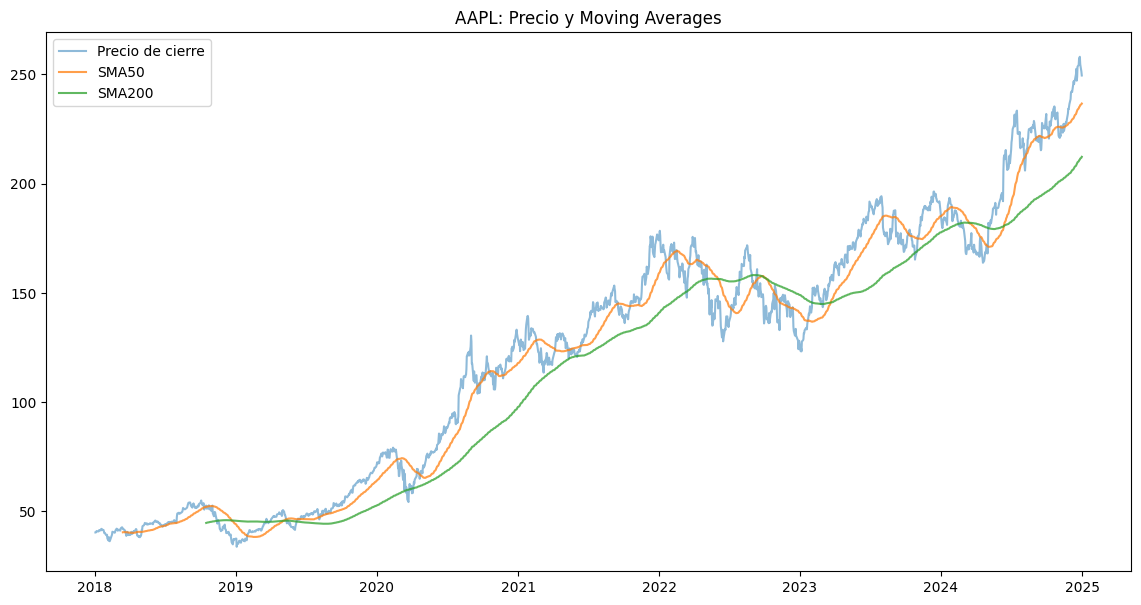

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(datos['Close'], label='Precio de cierre', alpha=0.5)
plt.plot(datos['SMA50'], label='SMA50', alpha=0.75)
plt.plot(datos['SMA200'], label='SMA200', alpha=0.75)
plt.title(f"{ticker}: Precio y Moving Averages")
plt.legend()
plt.show()

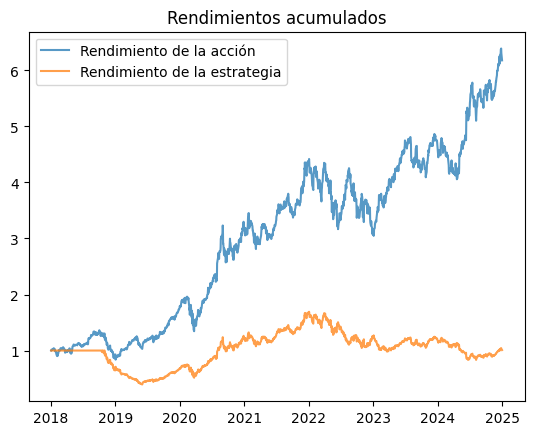

In [12]:
plt.plot(datos['rendim_acumulado_accion'], label = 'Rendimiento de la acción', alpha = 0.75)
plt.plot(datos['rendim_acumlado_estrategia'], label = 'Rendimiento de la estrategia', alpha = 0.75)
plt.title("Rendimientos acumulados")
plt.legend()
plt.show()

+ La visualización de las SMAs ayuda a identificar zonas de compra/venta cuando la SMA50 cruza por encima o por debajo de la SMA200.

+ Los gráfico de rendimientos acumulados compara el performance de la estrategia frente a mantener la acción sin aplicar ninguna estrategia de trading activa


In [13]:
rendim_total_estrategia = datos['rendim_acumlado_estrategia'].iloc[-1] - 1
rendim_total_accion = datos['rendim_acumulado_accion'].iloc[-1] - 1

print(f"Rendimiento total de la estrategia: {rendim_total_estrategia:.2%}")
print(f"Rendimiento total de la acción: {rendim_total_accion:.2%}")

Rendimiento total de la estrategia: 0.89%
Rendimiento total de la acción: 517.95%


In [14]:
# Se obtienen los datos históricos de Yahoo Finance
datos = yf.download(ticker, start = fecha_inicio, end = fecha_final)

/tmp/ipython-input-3437761740.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(ticker, start = fecha_inicio, end = fecha_final)
[*********************100%***********************]  1 of 1 completed


In [15]:
long_window = 200

datos['SMA200'] = datos['Close'].rolling(window = long_window).mean()
datos['EMA200'] = datos['Close'].ewm(span = long_window, adjust=False).mean()

Acá se usa una Exponentially Weighted Moving Average (EWMA / EWM)

$$EWM_t = \alpha P_t + (1 - \alpha)\,EWM_{t-1}$$

donde

* $EWM_t$: Exponentially weighted moving average al tiempo $t$
* $P_t$ = Precio al tiempo $t$
* $\alpha \in (0,1)$ : Factor de suavizamiento. $\alpha$ grande dará más ponderación a las observaciones recientes

In [16]:
datos = datos[['Close', 'SMA200', 'EMA200']].dropna().copy()

In [17]:
datos.head()

Price,Close,SMA200,EMA200
Ticker,AAPL,,
Date,,,
2018-10-16,52.674194,44.749423,46.362003
2018-10-17,52.446560,44.809751,46.422546
2018-10-18,51.220711,44.863985,46.470289
2018-10-19,52.000793,44.921181,46.525319
2018-10-22,52.318527,44.977657,46.582963


In [18]:
datos['Signal'] = 0

In [19]:
for i in range(len(datos) - 1):
  condicion_SMA = datos['Close'].iloc[i] > datos['SMA200'].iloc[i]
  condicion_EMA = datos['Close'].iloc[i] > datos['EMA200'].iloc[i]
  condicion_EMA = condicion_EMA.iloc[0]
  condicion_SMA = condicion_SMA.iloc[0]
  if condicion_SMA and condicion_EMA:
    datos['Signal'].iloc[i + 1] = 1
  else:
    datos['Signal'].iloc[i + 1] = -1

/tmp/ipython-input-699658592.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  datos['Signal'].iloc[i + 1] = 1
/tmp/ipython-input-699658592.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

In [20]:
datos.head()

Price,Close,SMA200,EMA200,Signal
Ticker,AAPL,,,
Date,,,,
2018-10-16,52.674194,44.749423,46.362003,0
2018-10-17,52.446560,44.809751,46.422546,0
2018-10-18,51.220711,44.863985,46.470289,0
2018-10-19,52.000793,44.921181,46.525319,0
2018-10-22,52.318527,44.977657,46.582963,0


In [21]:
# Se genera una columna de posiciones, se recorren las señales para evitar
# El sesgo look-akead
# La posición refleja la señal del día anterior
datos['posicion'] = datos['Signal'].shift(1)

# Se calcula el cambio porcentual diario del precio de la acción
datos['rendim_diario'] = datos['Close'].pct_change()

datos['rendim_estrategia'] = datos['posicion'] * datos['rendim_diario']

# Se obtienen los rendimientos acumulados
datos['rendim_acumulado_accion'] = (1 + datos['rendim_diario']).cumprod()
datos['rendim_acumlado_estrategia'] = (1 + datos['rendim_estrategia']).cumprod()

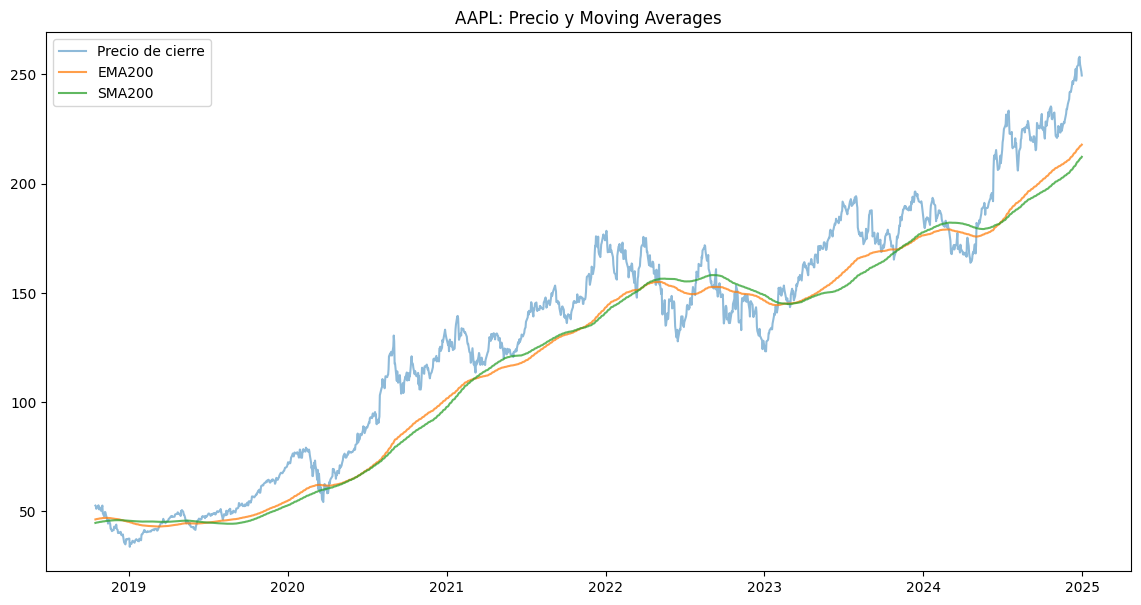

In [22]:
plt.figure(figsize=(14, 7))
plt.plot(datos['Close'], label='Precio de cierre', alpha=0.5)
plt.plot(datos['EMA200'], label='EMA200', alpha=0.75)
plt.plot(datos['SMA200'], label='SMA200', alpha=0.75)
plt.title(f"{ticker}: Precio y Moving Averages")
plt.legend()
plt.show()

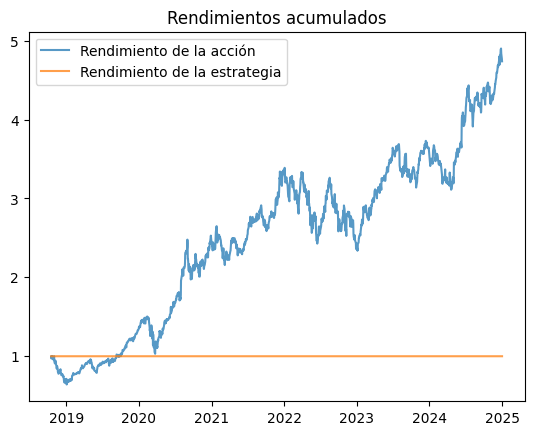

In [23]:
plt.plot(datos['rendim_acumulado_accion'], label = 'Rendimiento de la acción', alpha = 0.75)
plt.plot(datos['rendim_acumlado_estrategia'], label = 'Rendimiento de la estrategia', alpha = 0.75)
plt.title("Rendimientos acumulados")
plt.legend()
plt.show()

**RSI (Índice de Fuerza Relativa)**

**Cálculo:**
- RS = Promedio de ganancias (n períodos) / Promedio de pérdidas (n períodos)
- RSI = 100 - (100 / (1 + RS))
- Donde n = 14 períodos típicamente

**Señales:**
- **COMPRA**: RSI < 30
- **VENTA**: RSI > 70

**Ruptura de Soportes y Resistencias**

**Identificación:**
- **Resistencia** = max(precios) en ventana de tiempo local
- **Soporte** = min(precios) en ventana de tiempo local

**Señales:**
- **COMPRA**: precio(t) > Resistencia Y volumen(t) > volumen_promedio × 1.5
- **VENTA**: precio(t) < Soporte Y volumen(t) > volumen_promedio × 1.5

**MACD**

**Cálculo:**
- EMA_rápida = EMA(precio, 12)
- EMA_lenta = EMA(precio, 26)
- MACD_línea = EMA_rápida - EMA_lenta
- Señal_línea = EMA(MACD_línea, 9)
- Histograma = MACD_línea - Señal_línea

**Señales:**
- **COMPRA**: MACD_línea(t) > Señal_línea(t) Y MACD_línea(t-1) ≤ Señal_línea(t-1)
- **VENTA**: MACD_línea(t) < Señal_línea(t) Y MACD_línea(t-1) ≥ Señal_línea(t-1)

**Bandas de Bollinger**

**Cálculo:**
- Media = SMA(precio, 20)
- Desviación = STD(precio, 20)
- Banda_superior = Media + (2 × Desviación)
- Banda_inferior = Media - (2 × Desviación)

**Señales:**
- **COMPRA**: precio(t) ≤ Banda_inferior Y precio(t) > precio(t-1)
- **VENTA**: precio(t) ≥ Banda_superior Y precio(t) < precio(t-1)

`df['resistance'] = df['high'].rolling(window=window, center=True).max()`

`df['support'] = df['low'].rolling(window=window, center=True).min()`

`df['volume_avg'] = df['volume'].rolling(window=20).mean()`

`ema_fast = prices.ewm(span=fast, adjust=False).mean()`

`ema_slow = prices.ewm(span=slow, adjust=False).mean()`
    
`macd_line = ema_fast - ema_slow`

`signal_line = macd_line.ewm(span=signal, adjust=False).mean()`

`sma = prices.rolling(window=period).mean()`

`std = prices.rolling(window=period).std()`
    
`upper_band = sma + (std_dev * std)`

`lower_band = sma - (std_dev * std)`